In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy.special

In [2]:
def plot_permutation(P):
    n = len(P)
    x_values = [i for i in range(n)]
    y_values = P
    plt.scatter(x_values,y_values, label = str(P))

In [3]:
def unrank_permutation(n_list,d):
    n = len(n_list)
    nn_list = [h for h in n_list]
    if d == 0:
        return nn_list
    for k in range(n):
        if d < (k+1)*np.math.factorial(n-1):
            nn_list.remove(n_list[k])
            return [n_list[k]] + unrank_permutation(nn_list,d - k*np.math.factorial(n-1)) 

In [5]:
def unrank_binomial(n,k,d):
    if n == 0:
        return ""
    C = scipy.special.binom(n-1,k)
    if d < C:
        return "0" + unrank_binomial(n-1,k,d)
    else:
        return "1" + unrank_binomial(n-1,k-1,d-C)

In [6]:
def relative_order(p):
    '''takes a list of n distinct integers and returns the permutation from 0 to n-1 with the same relative order.'''
    n = len(p)
    SP = sorted(p)
    output = [0]*n
    for i in range(n):
        ind = SP.index(p[i])
        output[i] = ind
    return output

In [37]:
def avoids_231(permutation):
    """determines (True or False) if a permutation avoids the pattern 231"""
    n = len(permutation)
    if n<2:
        return True
    max_ind = 0
    for i in range(1,n):
        if permutation[max_ind] < permutation[i]:
            max_ind = i
    if avoids_231(permutation[:max_ind]):
        if avoids_231(permutation[max_ind+1:]):
            maxL = -1
            for j in range(max_ind):
                if permutation[j] > maxL:
                    maxL = permutation[j]
            for j in range(max_ind+1,n):
                if permutation[j] < maxL:
                    return False
            return True
    return False
    

In [8]:
def count_different_patterns(P,k):
    """counts the number of different patterns of length k in permutation P"""
    count = 0
    pattern_hash = defaultdict(int)
    n = len(P)
    C = scipy.special.binom(n,k)
    for i in range(int(C)):
        fbs = unrank_binomial(n,k,i)
        rel_order = []
        for j in range(n):
            if fbs[j] == "1":
                rel_order = rel_order + [P[j]]
        RO = str(relative_order(rel_order))
        if pattern_hash[RO] == 0:
            count = count + 1
        pattern_hash[RO] = pattern_hash[RO] + 1
    return count

In [9]:
def count_different_231_avoiders(P,k):
    """counts the number of different 231-avoiding patterns of length k in permutation P"""
    count = 0
    pattern_hash = defaultdict(int)
    n = len(P)
    C = scipy.special.binom(n,k)
    for i in range(int(C)):
        fbs = unrank_binomial(n,k,i)
        rel_order = []
        for j in range(n):
            if fbs[j] == "1":
                rel_order = rel_order + [P[j]]
        RO = str(relative_order(rel_order))
        if pattern_hash[RO] == 0:
            if avoids_231(rel_order):
                count = count + 1
                pattern_hash[RO] = pattern_hash[RO] + 1
    return count

In [32]:
def count_different_231_avoiders_and_others(P,k):
    """counts the number of different 231-avoiding patterns of length k in permutation P"""
    count231 = 0
    countothers = 0
    pattern_hash = defaultdict(int)
    n = len(P)
    C = scipy.special.binom(n,k)
    for i in range(int(C)):
        fbs = unrank_binomial(n,k,i)
        rel_order = []
        for j in range(n):
            if fbs[j] == "1":
                rel_order = rel_order + [P[j]]
        RO = str(relative_order(rel_order))
        if avoids_231(rel_order):
            if pattern_hash[RO] == 0:
                count231 = count231 + 1
                pattern_hash[RO] = pattern_hash[RO] + 1
        else:
            countothers = countothers + 1   
    return (count231,countothers)

In [39]:
avoids_231([1, 2, 4, 5, 6, 7, 0, 8, 9, 3,-1])

False

In [38]:
count_different_231_avoiders_and_others([1, 2, 4, 5, 6, 7, 0, 8, 9, 3],6)

(1, 182)

In [25]:
def crossover1(P1,P2):
    """random entry fill in the gaps"""
    n = len(P1)
    offspring = [-1]*n
    r = random.random()
    if r < 0.5:
        offspring[0] = P1[0]
    else:
        offspring[0] = P2[0]
    for i in range(1,n):
        r = random.random()
        if r < 0.5:
            j = i
            while P1[j] in offspring:
                j = (j+1) % n
            offspring[i] = P1[j]
        else:
            j = i
            while P2[j] in offspring:
                j = (j+1) % n
            offspring[i] = P2[j]
    return offspring

In [26]:
def crossover2(P1,P2):
    """cut and crossfill"""
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    j = r
    while j < n:
        for k in range(n):
            if P2[k] not in child1:
                child1[j] = P2[k]
                j=j+1
    j = r
    while j < n:
        for k in range(n):
            if P1[k] not in child2:
                child2[j] = P1[k]
                j = j+1
    return [child1,child2]

In [27]:
def crossover3(P1,P2):
    """cut and cross-pattern"""
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    RO1 = relative_order(P1[r:])
    RO2 = relative_order(P2[r:])
    k = 0
    for i in range(n):
        if i not in child1:
            child1[r+RO2.index(k)] = i
            k = k+1
    k=0
    for i in range(n):
        if i not in child2:
            child2[r+RO1.index(k)] = i
            k = k+1
    return [child1,child2]

In [28]:
def mut1(Perm,r1,r2):
    """helper function for mutation1"""
    n = len(Perm)
    output = [i for i in Perm]
    if r1 == r2:
        return(Perm)
    output[r1+1]=Perm[r2]
    for i in range(r1+2,r2+1):
        output[i] = Perm[i-1]
    return output


def mutation1(Perm):
    """does a single random transposition to a permutation"""
    n = len(Perm)
    r1 = random.randint(0,n-1)
    r2 = random.randint(0,n-1)
    if r1<=r2:
        return mut1(Perm,r1,r2)
    else:
        REV = [Perm[n-1-j] for j in range(n)]
        output = mut1(REV,r2,r1)
        return [output[n-1-j] for j in range(n)]

In [41]:
def Evolutionary_Algorithm_random_universality_231_strict(n,k,p,g,m,pp):
    """attempts to select the best n-length permutation based on how many different k-patterns are found"""
    """p is size of population, g is number of fitness evaluations until algorithm terminates, m is mutation rate, pp is the size of the 'parent pool' to select parents"""
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(p):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        (a,b) = count_different_231_avoiders_and_others(P,k)
        fitness = (a/(b+0.1),a,b)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for the number of fitness evaluations
    fe = 0
    #start the loop
    while(fe<g+1):
        #randomly select pp individuals from the POPulation to form the parent pool
        randomset = random.sample(POP,pp)
        #select the top 2 from the parent pool to be parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        P3 = randomset[-3]
        P4 = randomset[-4]
        crossover_type = random.randint(1,3)
        if crossover_type == 1:
            child1 = crossover1(P1[1],P4[1])
            child2 = crossover1(P2[1],P3[1])
        if crossover_type == 2:
            [child1,child2] = crossover2(P1[1],P2[1])
        if crossover_type == 3:
            [child1,child2] = crossover3(P1[1],P2[1])
        (a,b) = count_different_231_avoiders_and_others(child1,k)
        fitness1 = (a/(b+0.1),a,b)
        (a,b) = count_different_231_avoiders_and_others(child2,k)
        fitness2 = (a/(b+0.1),a,b)
        fe = fe+2
        #apply mutation to the offspring at a m mutation rate
        mr = random.random()
        while mr < m:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        (a,b) = count_different_231_avoiders_and_others(child1,k)
        fitness1 = (a/(b+0.1),a,b)
        (a,b) = count_different_231_avoiders_and_others(child2,k)
        fitness2 = (a/(b+0.1),a,b)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:p]
#        if fe % int(g/10) == 0:
#            print([fe],[POP[0]],[POP[j][0] for j in range(10)],[POP[-1][0]])
#            plot_permutation(POP[0][1])
#            plt.show()
    return POP

[1000] [[(530.0, 53, 0), [0, 8, 1, 6, 2, 4, 3, 5, 7, 9]]] [(530.0, 53, 0), (510.0, 51, 0), (460.0, 46, 0), (440.0, 44, 0), (420.0, 42, 0), (420.0, 42, 0), (420.0, 42, 0), (410.0, 41, 0), (400.0, 40, 0), (390.0, 39, 0)] [(0.05614823133071308, 10, 178)]


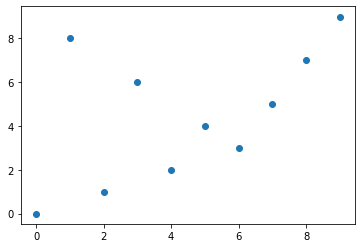

[2000] [[(530.0, 53, 0), [0, 8, 1, 6, 2, 4, 3, 5, 7, 9]]] [(530.0, 53, 0), (510.0, 51, 0), (470.0, 47, 0), (460.0, 46, 0), (460.0, 46, 0), (450.0, 45, 0), (440.0, 44, 0), (440.0, 44, 0), (430.0, 43, 0), (430.0, 43, 0)] [(0.10668163952835485, 19, 178)]


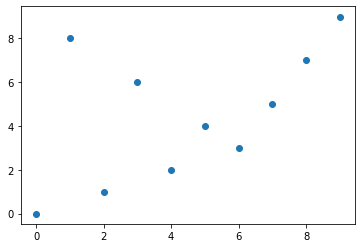

[3000] [[(530.0, 53, 0), [0, 8, 1, 6, 2, 4, 3, 5, 7, 9]]] [(530.0, 53, 0), (510.0, 51, 0), (470.0, 47, 0), (460.0, 46, 0), (460.0, 46, 0), (460.0, 46, 0), (460.0, 46, 0), (460.0, 46, 0), (450.0, 45, 0), (450.0, 45, 0)] [(0.1698236446766819, 26, 153)]


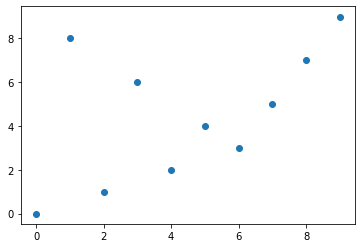

[4000] [[(560.0, 56, 0), [9, 0, 7, 3, 1, 2, 6, 4, 5, 8]]] [(560.0, 56, 0), (560.0, 56, 0), (530.0, 53, 0), (510.0, 51, 0), (510.0, 51, 0), (510.0, 51, 0), (510.0, 51, 0), (500.0, 50, 0), (500.0, 50, 0), (500.0, 50, 0)] [(0.2543142597638511, 28, 110)]


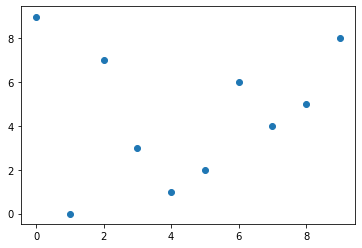

[5000] [[(560.0, 56, 0), [9, 0, 7, 3, 1, 2, 6, 4, 5, 8]]] [(560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (540.0, 54, 0), (540.0, 54, 0), (540.0, 54, 0), (530.0, 53, 0), (530.0, 53, 0), (510.0, 51, 0), (510.0, 51, 0)] [(0.3423680456490728, 24, 70)]


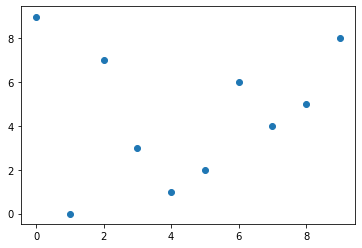

[6000] [[(560.0, 56, 0), [9, 0, 7, 3, 1, 2, 6, 4, 5, 8]]] [(560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (540.0, 54, 0), (540.0, 54, 0)] [(0.4761904761904762, 31, 65)]


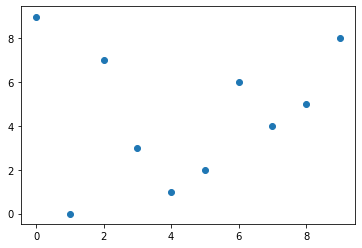

[7000] [[(570.0, 57, 0), [9, 0, 7, 4, 1, 3, 2, 6, 5, 8]]] [(570.0, 57, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0)] [(0.617059891107078, 34, 55)]


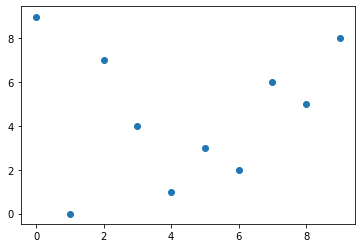

[8000] [[(570.0, 57, 0), [9, 0, 7, 4, 1, 3, 2, 6, 5, 8]]] [(570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0)] [(0.8711433756805808, 48, 55)]


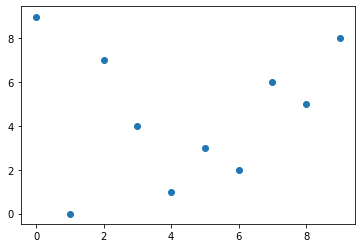

[9000] [[(570.0, 57, 0), [9, 0, 7, 4, 1, 3, 2, 6, 5, 8]]] [(570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0), (560.0, 56, 0)] [(1.3675213675213675, 48, 35)]


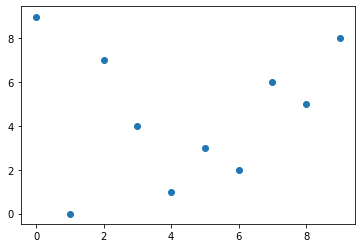

[10000] [[(570.0, 57, 0), [9, 0, 7, 4, 1, 3, 2, 6, 5, 8]]] [(570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0), (570.0, 57, 0)] [(230.0, 23, 0)]


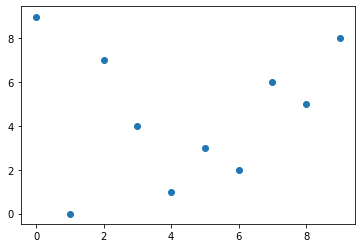

In [40]:
EA = Evolutionary_Algorithm_random_universality_231_strict(10,6,1000,10000,0.8,25)

In [42]:
U = [[0]*20 for i in range(20)]

In [43]:
for m in range(1,14):
    for k in range(1,14):
        n = k+m
        EA = Evolutionary_Algorithm_random_universality_231_strict(n,m,1000,10000,0.8,25)
        U[m][k] = EA[0][0]
        print(U[m][k][0]/10,(m,k))

1.0 (1, 1)
1.0 (1, 2)
1.0 (1, 3)
1.0 (1, 4)
1.0 (1, 5)
1.0 (1, 6)
1.0 (1, 7)
1.0 (1, 8)
1.0 (1, 9)
1.0 (1, 10)
1.0 (1, 11)
1.0 (1, 12)
1.0 (1, 13)
2.0 (2, 1)
2.0 (2, 2)
2.0 (2, 3)
2.0 (2, 4)
2.0 (2, 5)
2.0 (2, 6)
2.0 (2, 7)
2.0 (2, 8)
2.0 (2, 9)
2.0 (2, 10)
2.0 (2, 11)
2.0 (2, 12)
2.0 (2, 13)
3.0 (3, 1)
5.0 (3, 2)
5.0 (3, 3)
5.0 (3, 4)
5.0 (3, 5)
5.0 (3, 6)
5.0 (3, 7)
5.0 (3, 8)
5.0 (3, 9)
5.0 (3, 10)
5.0 (3, 11)
5.0 (3, 12)
5.0 (3, 13)
4.0 (4, 1)
8.0 (4, 2)
12.0 (4, 3)
14.0 (4, 4)
14.0 (4, 5)
14.0 (4, 6)
14.0 (4, 7)
14.0 (4, 8)
14.0 (4, 9)
14.0 (4, 10)
14.0 (4, 11)
14.0 (4, 12)
14.0 (4, 13)
5.0 (5, 1)
13.0 (5, 2)
22.0 (5, 3)
31.0 (5, 4)
38.0 (5, 5)
40.0 (5, 6)
42.0 (5, 7)
42.0 (5, 8)
42.0 (5, 9)
42.0 (5, 10)
42.0 (5, 11)
42.0 (5, 12)
42.0 (5, 13)
6.0 (6, 1)
18.0 (6, 2)
38.0 (6, 3)
56.0 (6, 4)
81.0 (6, 5)
93.0 (6, 6)
102.0 (6, 7)
117.0 (6, 8)
128.0 (6, 9)
125.0 (6, 10)
121.0 (6, 11)
124.0 (6, 12)
126.0 (6, 13)
7.0 (7, 1)
25.0 (7, 2)
58.0 (7, 3)
95.0 (7, 4)
137.0 (7, 5)
200.0 (7, 6)
250

KeyboardInterrupt: 